In [1]:
# İlgili Kütüphane ve fonksiyonları yüklüyoruz

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/kaggle/input/hr-comma-sepcsv/HR_comma_sep.csv')

In [3]:
# Toplu halde dosyaya göz atıyoruz.

def check_df(dataframe, head=5):
    print("######################  Shape  #####################")
    print(dataframe.shape)
    print("######################  Types  #####################")
    print(dataframe.dtypes)
    print("######################  Head  ######################")
    print(dataframe.head(head))
    print("####################### Tail #######################")
    print(dataframe.tail(head))
    print("#######################  NA  #######################")
    print(dataframe.isnull().sum())
    print("##################### Describe #####################")
    print(dataframe.describe().T)

check_df(df)

######################  Shape  #####################
(14999, 10)
######################  Types  #####################
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object
######################  Head  ######################
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   t

In [4]:
# "sales" sütunun adı garip ve uyumsuz geldiğinden sütunun adını "department" olarak değiştiriyoruz.

df.rename(columns={'sales': 'department'}, inplace=True)

In [5]:
# Kategorik değişkenlere sayılar vererek değiştiriyoruz.

df['salary'] = df['salary'].map({'low' : 0, 'medium' : 1, 'high' : 2})

In [6]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
df['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [8]:
df['salary'].value_counts()

salary
0    7316
1    6446
2    1237
Name: count, dtype: int64

In [9]:
table = df.groupby(['department', 'salary'])['satisfaction_level'].count().unstack()
table

salary,0,1,2
department,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


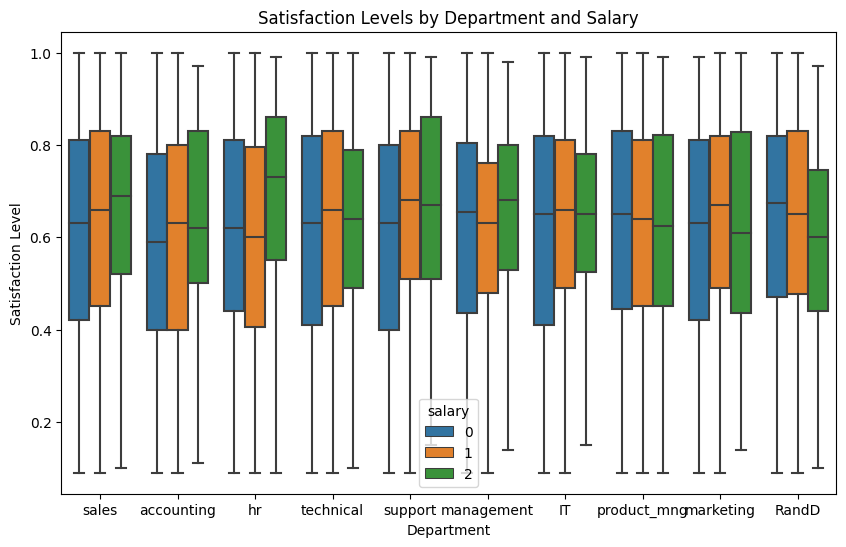

In [10]:
plt.figure(figsize=(10,6))
plt.title('Satisfaction Levels by Department and Salary')
sns.boxplot(x = 'department', y= 'satisfaction_level', hue= 'salary', data = df)
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.show()

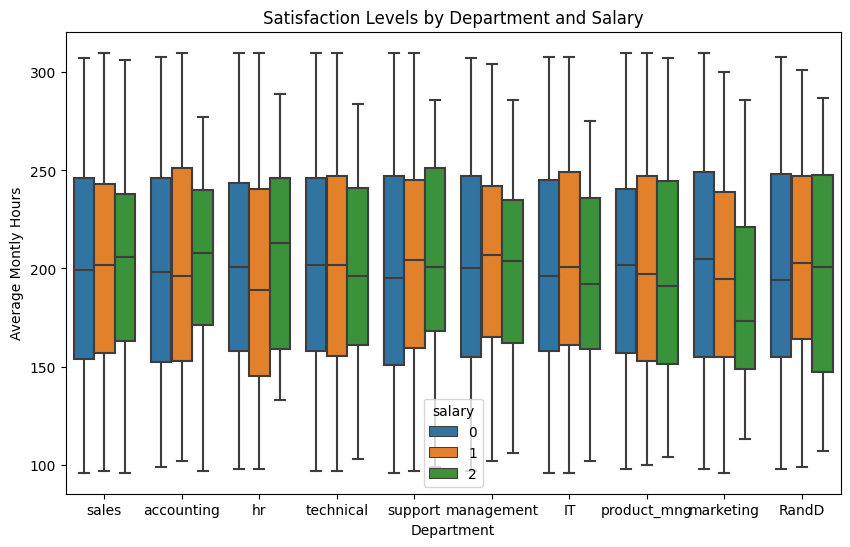

In [11]:
plt.figure(figsize=(10,6))
plt.title('Satisfaction Levels by Department and Salary')
sns.boxplot(x = 'department', y= 'average_montly_hours', hue= 'salary', data = df)
plt.xlabel('Department')
plt.ylabel('Average Montly Hours')
plt.show()

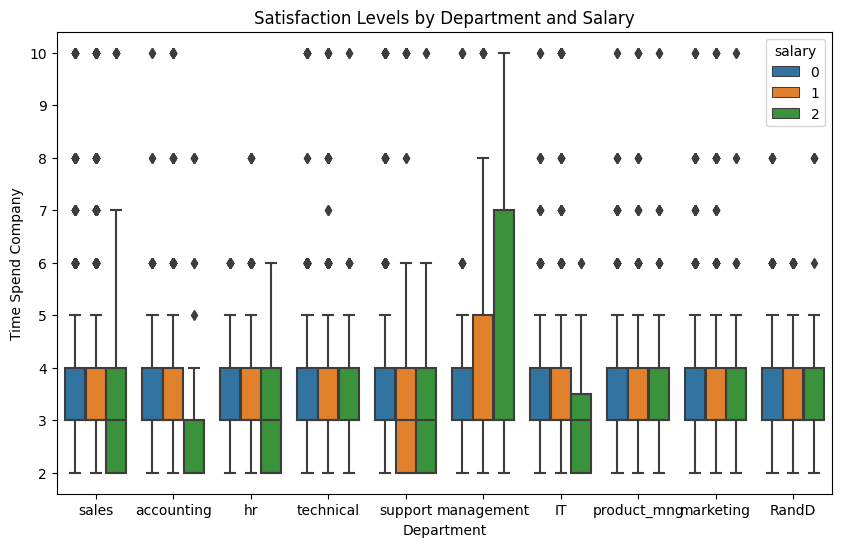

In [12]:
plt.figure(figsize=(10,6))
plt.title('Satisfaction Levels by Department and Salary')
sns.boxplot(x = 'department', y= 'time_spend_company', hue= 'salary', data = df)
plt.xlabel('Department')
plt.ylabel('Time Spend Company')
plt.show()

In [13]:
label_encoder = LabelEncoder()
df['department'] = label_encoder.fit_transform(df['department'])

In [14]:
department_mapping = {'sales': 0,
                      'accounting': 1,
                      'hr': 2,
                      'technical': 3,
                      'support': 4,
                      'management': 5,
                      'IT': 6,
                      'product_mng': 7,
                      'marketing': 8,
                      'RandD': 9}

df['department'] = df['department'].map(department_mapping)

In [15]:
label_encoder = LabelEncoder()
df['department_numeric'] = label_encoder.fit_transform(df['department'])

In [16]:
df['department_numeric'] = df['department_numeric'].astype(int)

In [17]:
df.drop(columns=['department'], inplace=True)

In [18]:
corr = df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_numeric
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022,NaN
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002,NaN
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803,NaN
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242,NaN
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715,NaN
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247,NaN
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898,NaN
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119,NaN
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000,NaN
department_numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


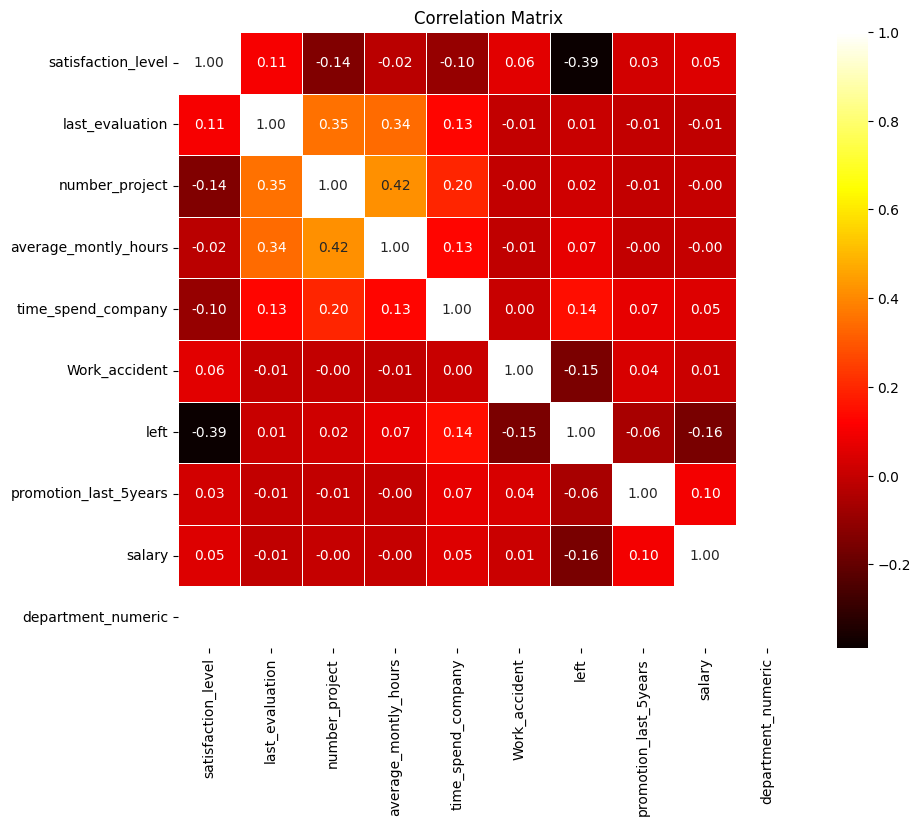

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='hot', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()